### Project Brief

The Lending CLub is the company with the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
# Note that all source file to be placed under the data folder in present directory.
import os
os.getcwd()

'C:\\Users\\pc'

In [2]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Lets explore the data

In [3]:
#reading loan.csv
df = pd.read_csv(filepath_or_buffer="loan.csv", low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### Data Handling and Cleaning

To make sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage
- Dropping the rows containing the missing values
- Imputing the missing values if required
- Keep the missing values if they don't affect the analysis

In [5]:
# checking what percentage have null values in all columns respectively 
round(100*(df.isnull().sum()/len(df.index)),4)

id                              0.0000
member_id                       0.0000
loan_amnt                       0.0000
funded_amnt                     0.0000
funded_amnt_inv                 0.0000
                                ...   
tax_liens                       0.0982
tot_hi_cred_lim               100.0000
total_bal_ex_mort             100.0000
total_bc_limit                100.0000
total_il_high_credit_limit    100.0000
Length: 111, dtype: float64

In [6]:
#removing all columns which one unique value throughout the dataframe
df.drop(columns=df.columns[df.nunique()==1], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 102 entries, id to total_il_high_credit_limit
dtypes: float64(71), int64(10), object(21)
memory usage: 30.9+ MB


In [8]:
#dropping all the column which has null values in all rows
df = df.dropna(how='all', axis=1)

In [9]:
df.shape

(39717, 48)

In [10]:
# checking what percentage have null values in all columns respectively 
round(100*(df.isnull().sum()/len(df.index)),4)

id                          0.0000
member_id                   0.0000
loan_amnt                   0.0000
funded_amnt                 0.0000
funded_amnt_inv             0.0000
term                        0.0000
int_rate                    0.0000
installment                 0.0000
grade                       0.0000
sub_grade                   0.0000
emp_title                   6.1913
emp_length                  2.7066
home_ownership              0.0000
annual_inc                  0.0000
verification_status         0.0000
issue_d                     0.0000
loan_status                 0.0000
url                         0.0000
desc                       32.5805
purpose                     0.0000
title                       0.0277
zip_code                    0.0000
addr_state                  0.0000
dti                         0.0000
delinq_2yrs                 0.0000
earliest_cr_line            0.0000
inq_last_6mths              0.0000
mths_since_last_delinq     64.6625
mths_since_last_reco

## Analysing the variable 
There are many variables in the data set which is not relevant for our analysis, also the data contains the loan status and information about the people who have taken loan so we are also droping those which are generated after the loan is approved such revolving balance, next payment date etc.

In [11]:
#dropping the unwanted columns -> columns which are personal data + redundant columns with meaningless info + repeatative columns + redundant date columns
df.drop(columns=["member_id","id","url","title","zip_code","emp_title","desc","funded_amnt_inv","out_prncp_inv","total_pymnt_inv","last_pymnt_d","last_credit_pull_d","funded_amnt","total_rec_late_fee"],inplace=True)
df.drop(columns=["recoveries","next_pymnt_d","total_pymnt","revol_bal","inq_last_6mths","delinq_2yrs","mths_since_last_record","mths_since_last_delinq","revol_util","last_pymnt_amnt","collection_recovery_fee","total_rec_prncp","total_rec_int"],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  addr_state            39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  earliest_cr_line   

In [13]:
#checking the total perecent of null values in each column
round(100*(df.isnull().sum()/len(df.index)),4)

loan_amnt               0.0000
term                    0.0000
int_rate                0.0000
installment             0.0000
grade                   0.0000
sub_grade               0.0000
emp_length              2.7066
home_ownership          0.0000
annual_inc              0.0000
verification_status     0.0000
issue_d                 0.0000
loan_status             0.0000
purpose                 0.0000
addr_state              0.0000
dti                     0.0000
earliest_cr_line        0.0000
open_acc                0.0000
pub_rec                 0.0000
total_acc               0.0000
out_prncp               0.0000
pub_rec_bankruptcies    1.7549
dtype: float64

In [14]:
# removing all rows where emp_length,pub_rec_bankruptcies title have null values
df=df[~df.emp_length.isnull()]
df=df[~df.pub_rec_bankruptcies.isnull()]
round(100*(df.isnull().sum()/len(df.index)),2)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
total_acc               0.0
out_prncp               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [15]:
# removing records with loan status as current it's irrelevant
df=df[~(df.loan_status=="Current")]
#droping out_prncp as the remaining amount is 0 for other loan status
df=df.drop("out_prncp",axis=1)
df.shape

(36847, 20)

#### Handling Incorrect Data Types 

In [16]:
df.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [17]:
#Analysing the term column
df.term.value_counts()

 36 months    27590
 60 months     9257
Name: term, dtype: int64

In [18]:
#Removing months from the column and converting into int
df.term=df.term.apply(lambda x: int(x.replace("months","")))
df.term.dtypes

dtype('int64')

In [19]:
#Analysing the int_rate column
df.int_rate.value_counts()

10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
24.40%      1
10.46%      1
22.94%      1
9.83%       1
11.22%      1
Name: int_rate, Length: 336, dtype: int64

In [20]:
#Changing the data type and replace the % sign
df.int_rate=df.int_rate.apply(lambda x: float(x.replace("%","")))
df.int_rate.dtypes

dtype('float64')

In [21]:
# creating a method for converting the date columns
from datetime import datetime
from dateutil.relativedelta import relativedelta
def convertDate(l):
        return l.apply(lambda x: datetime.strptime(x, '%b-%y')).apply(lambda x : x - relativedelta(years=100) if x.year>2011 else x)

In [22]:
#converting issue_d and earliest_cr_line to datetime and handling date amguity issue
df['issue_d'] = convertDate(df.issue_d)
df['earliest_cr_line'] = convertDate(df.earliest_cr_line)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  int64         
 1   term                  36847 non-null  int64         
 2   int_rate              36847 non-null  float64       
 3   installment           36847 non-null  float64       
 4   grade                 36847 non-null  object        
 5   sub_grade             36847 non-null  object        
 6   emp_length            36847 non-null  object        
 7   home_ownership        36847 non-null  object        
 8   annual_inc            36847 non-null  float64       
 9   verification_status   36847 non-null  object        
 10  issue_d               36847 non-null  datetime64[ns]
 11  loan_status           36847 non-null  object        
 12  purpose               36847 non-null  object        
 13  addr_state      

In [24]:
# dropping all the rows for outliers of addr_state i.e. count is less than 50 in total data
value_counts = df['addr_state'].value_counts()
df = df[~df.addr_state.isin(value_counts[value_counts <= 50].index)]

In [25]:
df.addr_state.value_counts()

CA    6685
NY    3512
FL    2642
TX    2559
NJ    1735
IL    1430
PA    1428
VA    1307
GA    1294
MA    1230
OH    1129
MD     980
AZ     794
WA     760
CO     721
CT     697
NC     695
MI     662
MO     639
MN     576
NV     461
SC     443
OR     415
AL     411
WI     409
LA     408
KY     305
OK     281
KS     242
UT     241
AR     224
DC     208
RI     190
NM     173
WV     164
HI     161
NH     154
DE     108
MT      77
AK      75
WY      75
SD      60
VT      51
Name: addr_state, dtype: int64

#### Outliers Analysis Using Boxplot

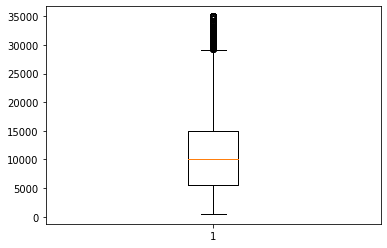

In [26]:
#Creating the  box plot for loan amount
plt.boxplot(df.loan_amnt)
plt.show()

In [27]:
# checking value for loan_amnt
df[df.loan_amnt>30000]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
31,31825,36,7.90,995.82,A,A4,5 years,MORTGAGE,75000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,NJ,14.03,1981-11-01,12,0,26,0.0
80,35000,60,17.27,551.84,D,D3,3 years,MORTGAGE,150000.0,Verified,2011-12-01,Fully Paid,home_improvement,NY,7.51,2003-06-01,11,0,31,0.0
128,35000,36,8.90,1111.37,A,A5,6 years,MORTGAGE,125000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,CA,22.71,2000-08-01,8,0,32,0.0
185,35000,36,10.65,1140.07,B,B2,2 years,MORTGAGE,168000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,TX,3.17,2002-12-01,16,0,22,0.0
268,35000,60,18.64,690.56,E,E1,8 years,MORTGAGE,85000.0,Verified,2011-12-01,Fully Paid,debt_consolidation,IL,12.00,1995-01-01,16,0,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19604,35000,60,16.40,858.59,E,E1,< 1 year,OWN,75000.0,Verified,2011-02-01,Fully Paid,debt_consolidation,NJ,10.11,1991-02-01,14,0,19,0.0
19740,35000,60,18.99,907.73,F,F3,10+ years,RENT,128000.0,Verified,2011-02-01,Fully Paid,debt_consolidation,NY,12.27,1991-04-01,7,0,14,0.0
19800,32000,60,20.85,863.01,G,G3,5 years,RENT,62400.0,Verified,2011-02-01,Fully Paid,debt_consolidation,MA,13.04,2003-04-01,4,0,11,0.0
19811,32000,60,19.74,843.19,F,F5,8 years,RENT,93500.0,Verified,2011-02-01,Fully Paid,debt_consolidation,NY,16.36,2004-05-01,10,1,12,1.0


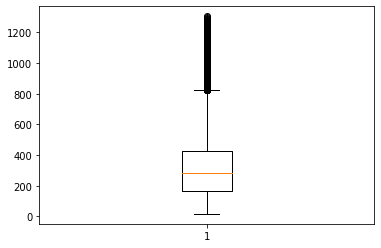

In [28]:
#Creating box plot for installment
plt.boxplot(df.installment)
plt.show()

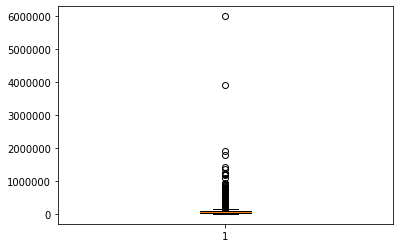

In [29]:
#Creating box plot for annual income
plt.boxplot(df.annual_inc)
plt.show()

In [30]:
#Checking the  values above 1500000
df[df.annual_inc>=1300000]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
7247,12025,36,14.27,412.57,C,C2,10+ years,RENT,1782000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,1.31,1987-12-01,9,0,30,0.0
23551,1500,36,6.17,45.75,A,A3,5 years,MORTGAGE,1900000.0,Source Verified,2010-11-01,Fully Paid,credit_card,TX,0.57,1981-06-01,17,0,36,0.0
29639,25000,60,10.62,334.08,B,B3,3 years,MORTGAGE,3900000.0,Not Verified,2010-06-01,Fully Paid,home_improvement,NM,0.20,1999-09-01,12,0,32,0.0
30107,5000,36,12.73,167.84,C,C1,10+ years,MORTGAGE,6000000.0,Source Verified,2010-05-01,Fully Paid,home_improvement,CA,0.01,2001-01-01,2,0,10,0.0
33982,6400,36,7.40,198.78,A,A2,7 years,MORTGAGE,1440000.0,Not Verified,2009-11-01,Fully Paid,major_purchase,CA,0.00,1995-12-01,6,0,38,0.0
34304,6600,36,7.74,206.05,A,A3,9 years,MORTGAGE,1362000.0,Not Verified,2009-11-01,Fully Paid,debt_consolidation,CO,0.62,1996-11-01,13,0,36,0.0


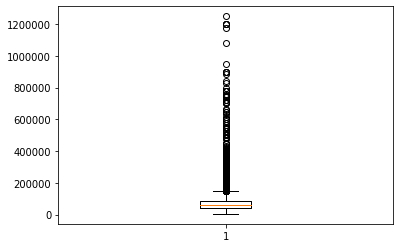

In [31]:
# removing the outilers from annual income 
df=df[df.annual_inc<1300000]
plt.boxplot(df.annual_inc)
plt.show()

In [32]:
#dropping pub_rec as it's data isn't evenly distributed and it own't gove conclusion 
df.drop(columns=["pub_rec"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36805 entries, 0 to 39666
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36805 non-null  int64         
 1   term                  36805 non-null  int64         
 2   int_rate              36805 non-null  float64       
 3   installment           36805 non-null  float64       
 4   grade                 36805 non-null  object        
 5   sub_grade             36805 non-null  object        
 6   emp_length            36805 non-null  object        
 7   home_ownership        36805 non-null  object        
 8   annual_inc            36805 non-null  float64       
 9   verification_status   36805 non-null  object        
 10  issue_d               36805 non-null  datetime64[ns]
 11  loan_status           36805 non-null  object        
 12  purpose               36805 non-null  object        
 13  addr_state      

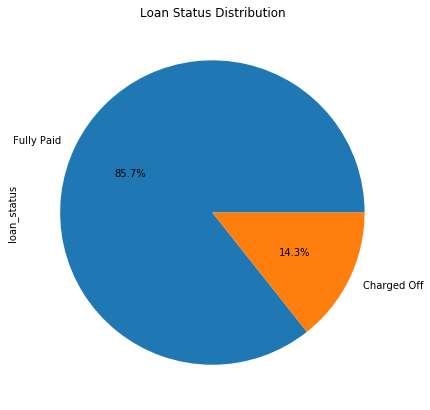

In [33]:
# distribution of loan_staus in the whole dataset
plt.figure(figsize=(7,7))
piechart=df.loan_status.value_counts().plot.pie(autopct='%1.1f%%')
piechart.set(title="Loan Status Distribution")
plt.show()

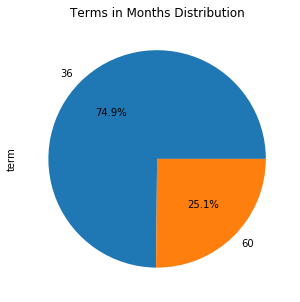

In [34]:
# distribution of terms in the whole dataset
plt.figure(figsize=(5,5))
piechart=df.term.value_counts().plot.pie(autopct='%1.1f%%')
piechart.set(title="Terms in Months Distribution")
plt.show()

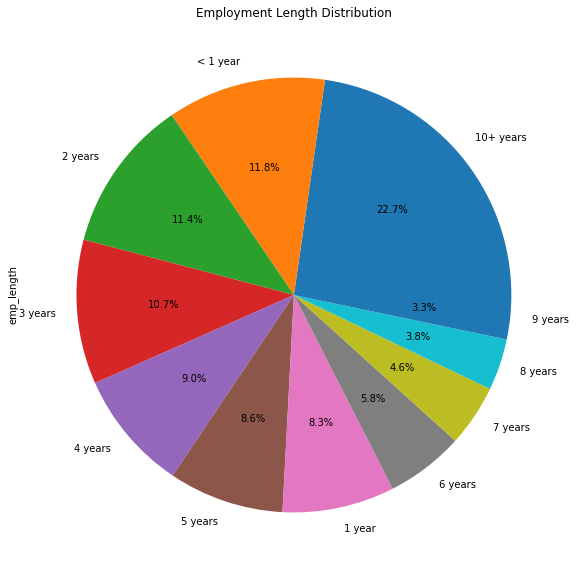

In [35]:
plt.figure(figsize=(10,10))
piechart=df.emp_length.value_counts().plot.pie(autopct='%1.1f%%')
piechart.set(title="Employment Length Distribution")
plt.show()

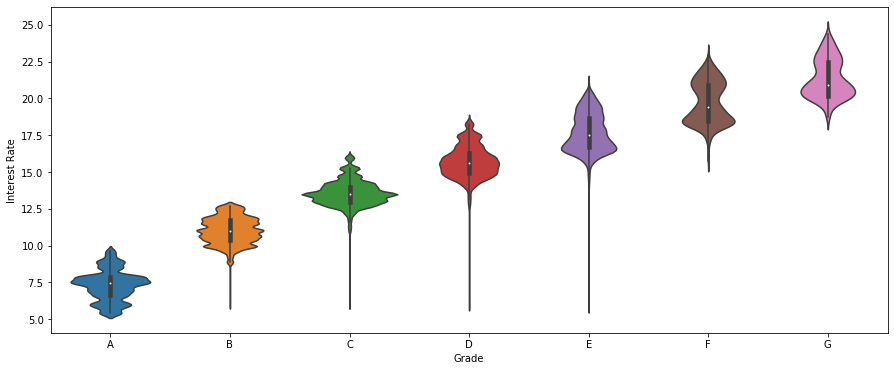

In [36]:
# violet plot between interest rate and grade 
plt.subplots(figsize=(15,6))
intgrvio = sns.violinplot(x="grade", y="int_rate", data=df, order="ABCDEFG")
intgrvio.set(xlabel="Grade",ylabel="Interest Rate")
plt.show()

### Summary
- A to G -> the interest also increases .
- So we can conclude that if the grade is low then the interest rate is suppose to be high


In [37]:
df.loan_status.value_counts()

Fully Paid     31528
Charged Off     5277
Name: loan_status, dtype: int64

### Default Rate
- The annalysis is to found the drving force of borrower to be a defaulter, so we are considering the loan status of "Charged Off" as 1 and "Fully Paid" as 0 and through this we will calculating dafault rate for every variable

In [38]:
#creating a new column for calculating rate of default rate based on loan_status
df["default_rate"]=df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

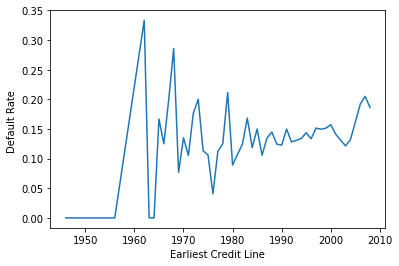

In [39]:
# plotting a bar plot between default rate and year of  earliest_cr_line
plt.xticks(fontsize=10)
#plt.figure(figsize=(10,5))
earlycrbar = df.groupby(df['earliest_cr_line'].map(lambda x: x.year))['default_rate'].mean().plot()
earlycrbar.set(xlabel="Earliest Credit Line",ylabel="Default Rate ")
plt.show()

earliest credit line plot has very inconclusinve line plot. Hence it can be dropped . 

In [40]:
#dropping earliest_cr_line
df.drop(columns=["earliest_cr_line"],inplace=True)

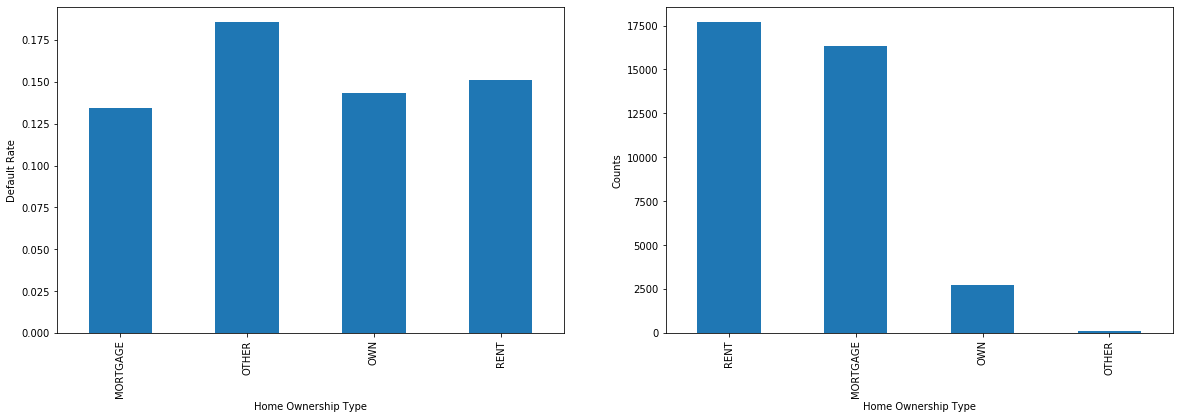

In [41]:
# plotting a bar graph between home_ownership and default rate -> 1

# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

# subplot 1:
plt.subplot(1, 2, 1)
barplot = df.groupby(['home_ownership'])['default_rate'].mean().plot.bar()
barplot.set(xlabel="Home Ownership Type",ylabel="Default Rate")

# subplot 2:
plt.subplot(1, 2, 2)
countplot=df.home_ownership.value_counts().plot.bar()
countplot.set(xlabel="Home Ownership Type",ylabel="Counts")

plt.show()

### Summary
- We can observe that there are less no. of loan applicant with other as category but Other -> type of home ownership has the highest rate of default 
- We can also observe that loan applicant with Home ownership status as "Own" are less in no. then as Rent and Mortgage but the default rate is almost simmilar 

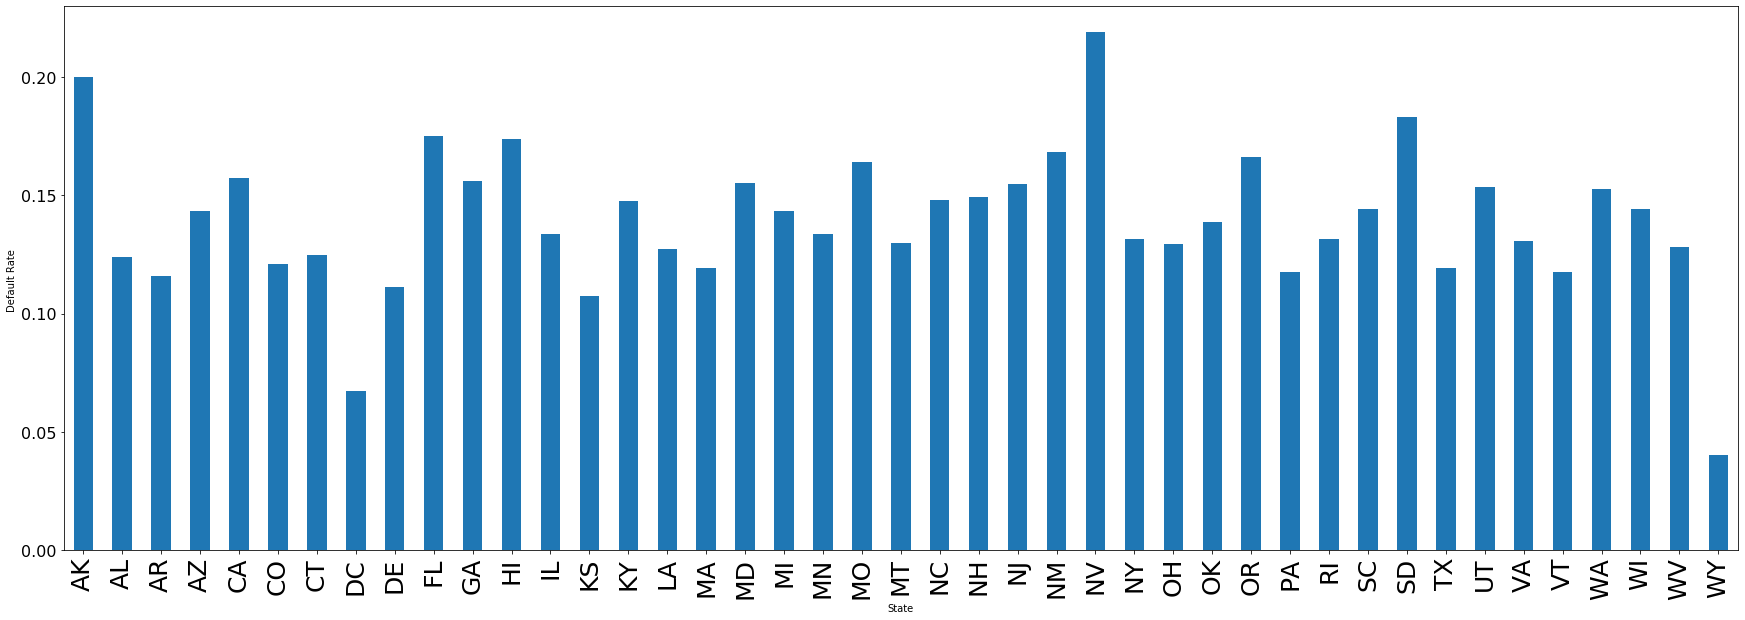

In [42]:
#plotting a bar plot between the state names and default rate -> 2
plt.figure(figsize=(30,10))
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)
statebar = df.groupby(['addr_state'])['default_rate'].mean().plot.bar()
statebar.set(xlabel="State",ylabel="Default Rate ")
plt.show()

### Summary
- State NV has the highest rate of default where as State WY has the lowest rate

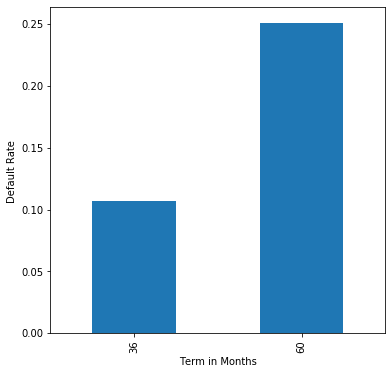

In [43]:
#plotting a bar plot between default rate and term -> 3

#increse in fiqure size
plt.figure(figsize=(6, 6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

termbar = df.groupby(['term'])['default_rate'].mean().plot.bar()
termbar.set(xlabel="Term in Months",ylabel="Default Rate ")

plt.show()

### Summary
- Loans with 60 months term are highly likely to default where as loans with 36 months term  are less likely to default 

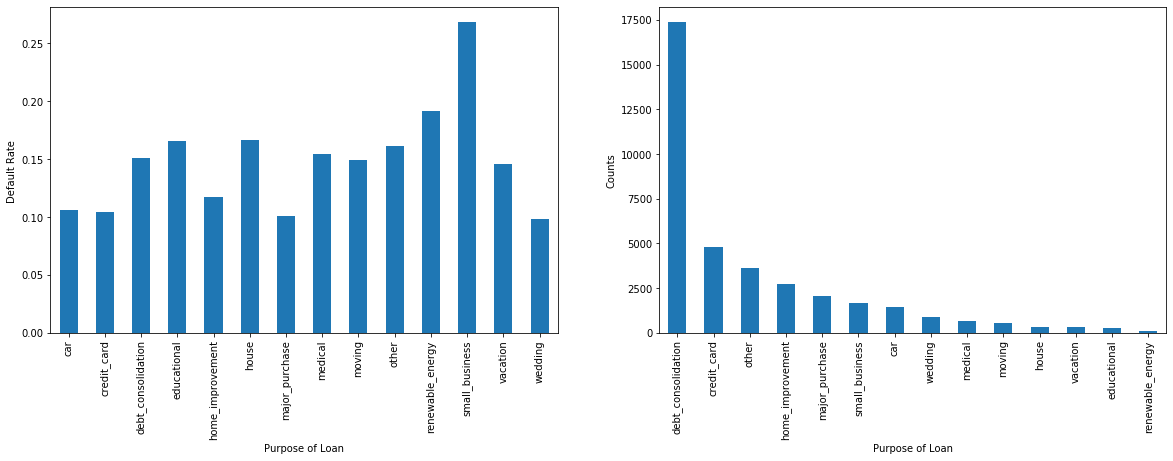

In [44]:
# plotting a bar plot between default rate and purpose -> 4
# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

# subplot 1:
plt.subplot(1,2,1)
purposebar = df.groupby(['purpose'])['default_rate'].mean().plot.bar()
purposebar.set(xlabel="Purpose of Loan",ylabel="Default Rate ")

# subplot 2:
plt.subplot(1,2,2)
countplot=df.purpose.value_counts().plot.bar()
countplot.set(xlabel="Purpose of Loan",ylabel="Counts")

plt.show()

### Summary
- Loan with Purpose -> Small Business have high default rate
- Also we can observe that most of the people take loan for debt consolidation

In [45]:
# creating a column int_rate_bucket based on the annual income of a person
df['int_rate_bucket'] = pd.cut(df.int_rate,bins=4,labels=["L","M","H","VH"])

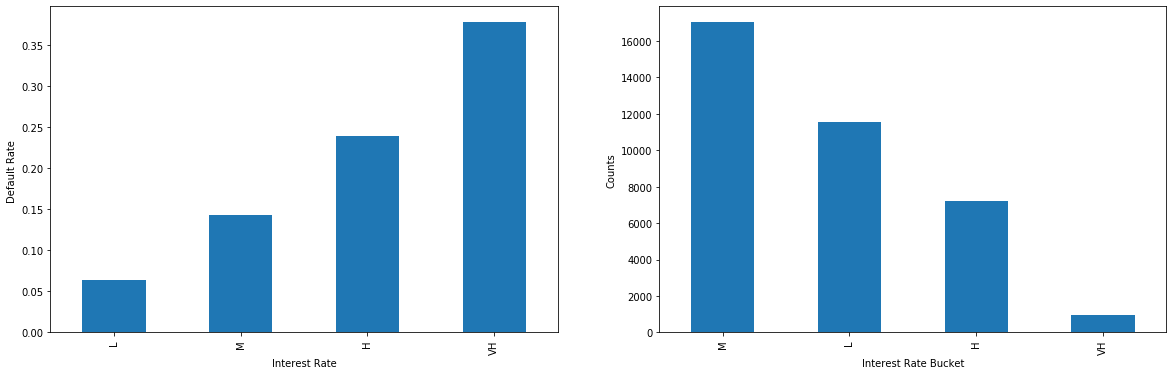

In [46]:
# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xticks(fontsize=20)

# plotting a bar plot between default rate and int_rate_bucket
#Subplo1:
plt.subplot(1,2,1)
intratebar  = df.groupby(df['int_rate_bucket'])['default_rate'].mean().plot.bar()
intratebar.set(xlabel="Interest Rate",ylabel="Default Rate ")

#Subplot 2:
plt.subplot(1,2,2)
countplot = df.int_rate_bucket.value_counts().plot.bar()
countplot.set(xlabel="Interest Rate Bucket",ylabel="Counts")

plt.show()

### Summary
- Interest Rate is directly proportional to Default Rate
- When interest rate is VH that is between 19.66 and 24.4 the default rate is most 
- We can observe most of the people are charged interest rate in M range which is between 10.2 and 14.84

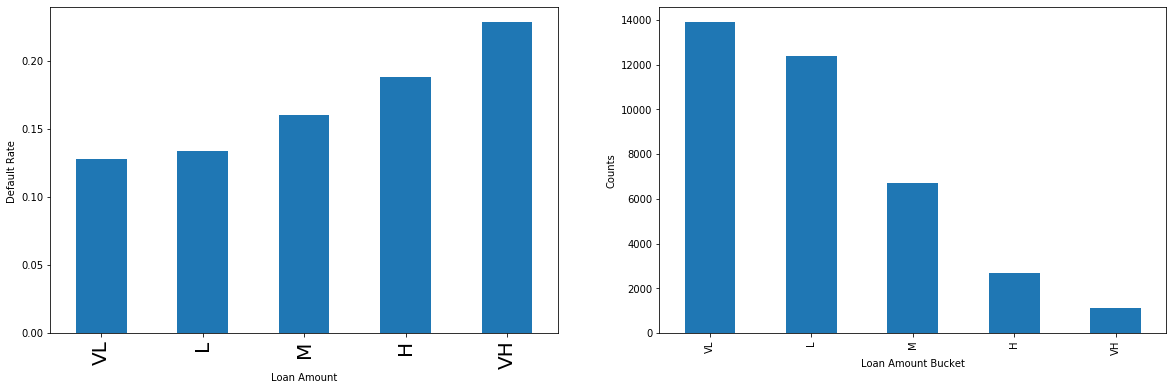

In [47]:
# creating a column loan_amnt_bucket based on the annual income of a person
df['loan_amnt_bucket'] = pd.cut(df.loan_amnt,bins=5,labels=["VL","L","M","H","VH"])

# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

# plotting a bar plot between default rate and loan_amnt
#Subplo1:
plt.subplot(1,2,1)
plt.xticks(fontsize=20)
intratebar  = df.groupby(df['loan_amnt_bucket'])['default_rate'].mean().plot.bar()
intratebar.set(xlabel="Loan Amount",ylabel="Default Rate ")

#Subplot 2:
plt.subplot(1,2,2)
countplot = df.loan_amnt_bucket.value_counts().plot.bar()
countplot.set(xlabel="Loan Amount Bucket",ylabel="Counts")

plt.show()

### Summary
- Loan Amount is directly proportional to Default Rate
- Maximum people take loan in range of 500 and 7400
- So as the loan amount increases, people are more likely to be defaulter

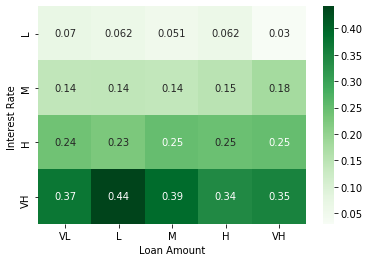

In [48]:
# creating a heatmap among int_rate_bucket , inc_bucket and loan_cal
res = pd.pivot_table(data=df,index="int_rate_bucket",columns="loan_amnt_bucket",values="default_rate",aggfunc=np.mean)
ildheatmap = sns.heatmap(res , cmap = "Greens", annot=True)
ildheatmap.set(xlabel="Loan Amount",ylabel="Interest Rate ")
plt.show()

### Summary 
- From the heatmap we can conclude that if interest rate and loan amount is high then there is relatively high chances of default

In [49]:
# creating a column inc_bucket based on the annual income of a person
df['inc_bucket'] = pd.cut(df.annual_inc,bins=5,labels=["VL","L","M","H","VH"])

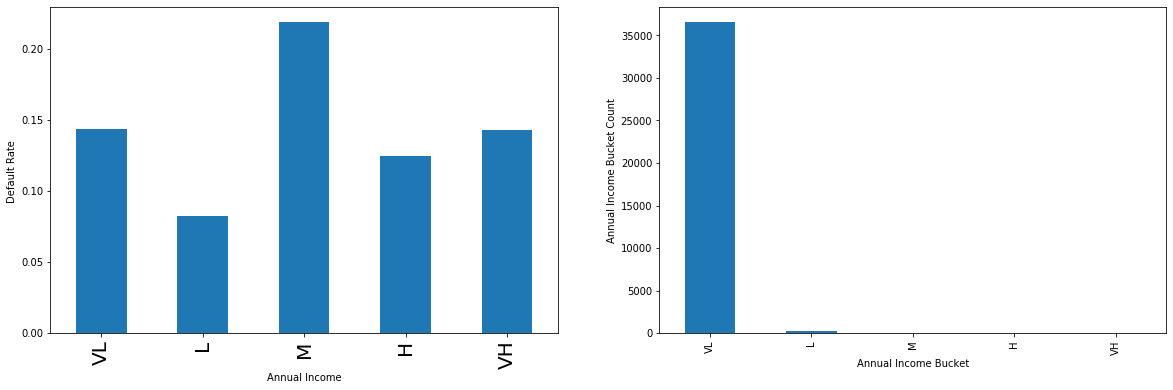

In [50]:
# plotting a bar plot between default rate and inc_bucket
# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
# plotting a bar plot between default rate and annual income
#Subplo1:
plt.subplot(1,2,1)
plt.xticks(fontsize=20)
incomebar  = df.groupby(df['inc_bucket'])['default_rate'].mean().plot.bar()
incomebar.set(xlabel="Annual Income",ylabel="Default Rate ")

#Subplot 2:
plt.subplot(1,2,2)
aibuck = df.inc_bucket.value_counts().plot.bar()
aibuck.set(xlabel="Annual Income Bucket",ylabel="Annual Income Bucket Count")

plt.show()

### Summary
- Loans with Medium annual income that is in between 756000 and 948000 have the highest default rate
- Most of the loans went in for people who's annual income is in the range of 4000 and 252361

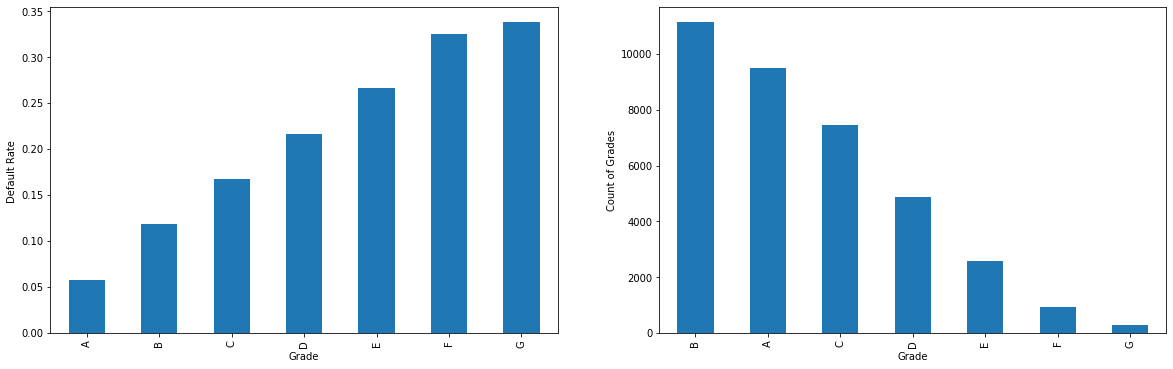

In [51]:
# plotting grade vs default rate and checking the count of them for each grade

# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

#Subplot 1:
plt.subplot(1,2,1)
gradebar = df.groupby(df['grade'])['default_rate'].mean().plot.bar()
gradebar.set(xlabel="Grade",ylabel="Default Rate ")


#Subplot 2:
plt.subplot(1,2,2)
countplot = df.grade.value_counts().plot.bar()
countplot.set(xlabel="Grade",ylabel="Count of Grades")

plt.show()

### Summary
- From A to G as the grade decreases the default rate increases 
- Maximum loans are graded with B . 

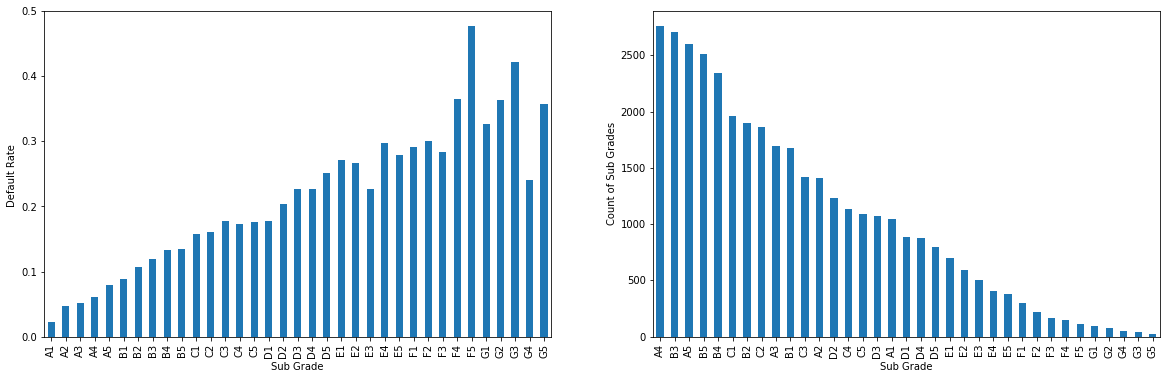

In [52]:
# plotting sub grade vs default rate and checking the count of them for each grade

# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

#Subplot 1:
plt.subplot(1,2,1)
subgradebar = df.groupby(df['sub_grade'])['default_rate'].mean().plot.bar()
subgradebar.set(xlabel="Sub Grade",ylabel="Default Rate ")


#Subplot 2:
plt.subplot(1,2,2)
subcountplot = df.sub_grade.value_counts().plot.bar()
subcountplot.set(xlabel="Sub Grade",ylabel="Count of Sub Grades")

plt.show()

### Summary
- F5 has the highest amount of default rate


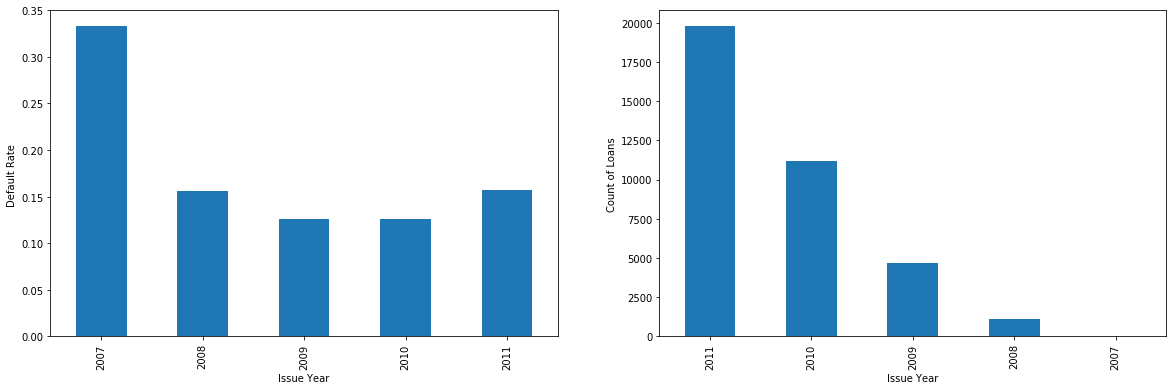

In [53]:
# plottingn the count of loan in each year and checking the count of them

# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

#Subplot 1:
plt.subplot(1,2,1)
idyline = df.groupby(df['issue_d'].map(lambda x: x.year))['default_rate'].mean().plot.bar()
idyline.set(xlabel="Issue Year",ylabel="Default Rate ")


#Subplot 2:
plt.subplot(1,2,2)
countplot = df.issue_d.dt.year.value_counts().plot.bar()
countplot.set(xlabel="Issue Year",ylabel="Count of Loans")

plt.show()

### Summary
- 2007 to 2011 the default rate had the highest value in 2007,2008 after that it had a steep decline and then it stabilized
- 2007 to 2011 the Count of Loans per year has increased continuously 


In [54]:
## creating dti bucket 
df['dti_bucket'] = pd.cut(df.dti,bins=6,labels=["VL","L","M","H","VH","VVH"])

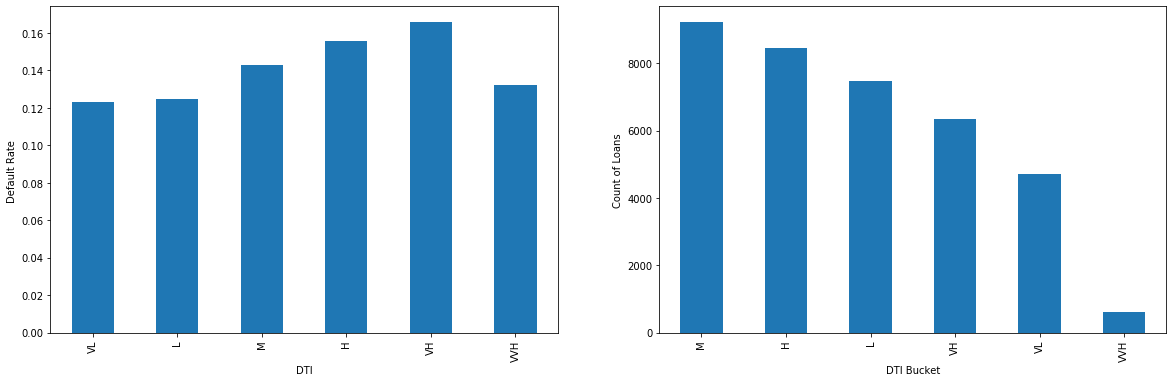

In [55]:
# plotting dti against default rate and checking the count of them 

# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

#Subplot 1:
plt.subplot(1,2,1)
dtibar = df.groupby(df['dti_bucket'])['default_rate'].mean().plot.bar()
dtibar.set(xlabel="DTI",ylabel="Default Rate ")


#Subplot 2:
plt.subplot(1,2,2)
countplot = df.dti_bucket.value_counts().plot.bar()
countplot.set(xlabel="DTI Bucket",ylabel="Count of Loans")

plt.show()

### Summary 
- DTI has maintained a small but proportional relationship with default rate mostly
- Most of the loans have a DTI value between 10 and 15

In [56]:
## creating open acc bucket 
df['open_acc_bucket'] = pd.cut(df.open_acc,bins=6,labels=["VL","L","M","H","VH","VVH"])

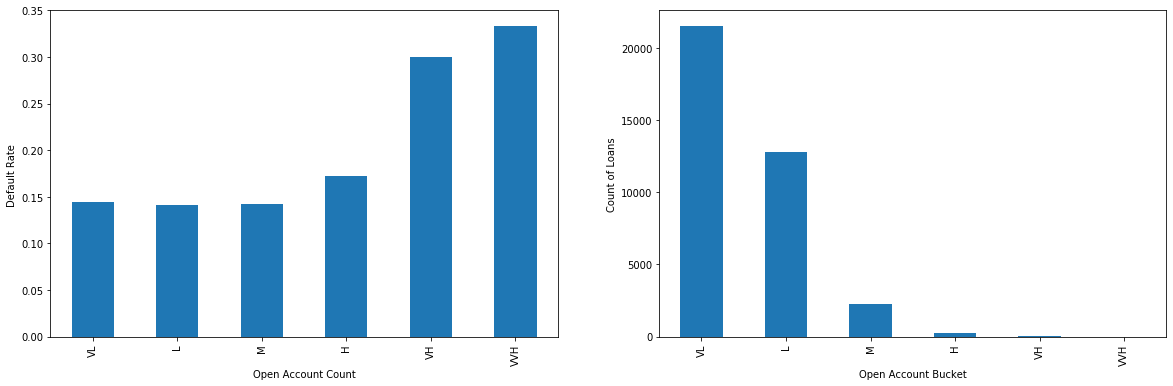

In [57]:
# plotting a bar plot between default rate and open_acc_bucket and plotting the count of them
# increase figure size 
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xticks(fontsize=20)
#Subplot 1:
plt.subplot(1,2,1)
oacbucketbar = df.groupby(df['open_acc_bucket'])['default_rate'].mean().plot.bar()
oacbucketbar.set(xlabel="Open Account Count",ylabel="Default Rate ")


#Subplot 2:
plt.subplot(1,2,2)
countplot = df.open_acc_bucket.value_counts().plot.bar()
countplot.set(xlabel="Open Account Bucket",ylabel="Count of Loans")

plt.show()

### Summary
- For open account count between 30 to 45 the default rate is relatively higher

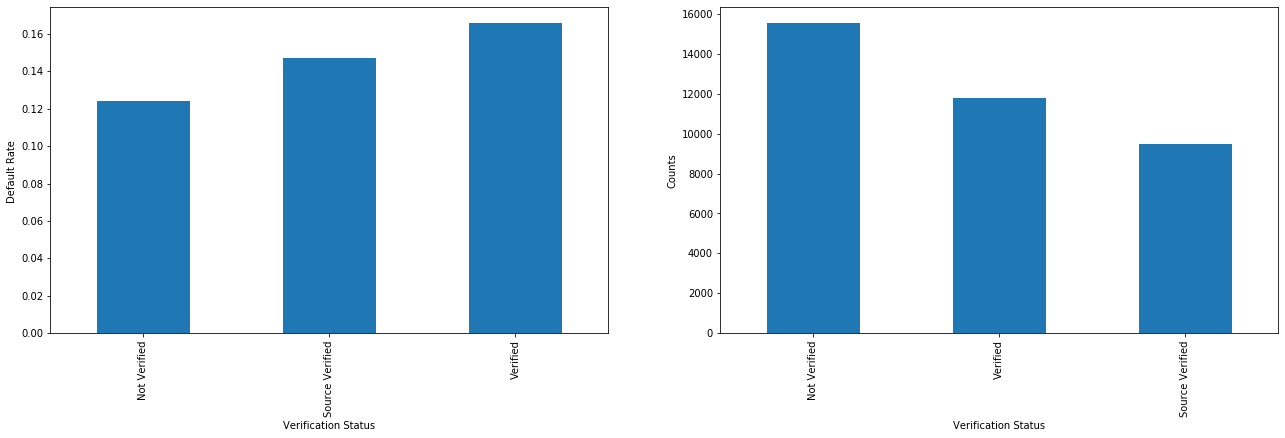

In [58]:
#ploting graph for the verification_status and default_rate
# increase figure size 
plt.figure(figsize=(22, 6))
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

#Subplot 1:
plt.subplot(1,2,1)
verbar = df.groupby(df['verification_status'])["default_rate"].mean().plot.bar()
verbar.set(xlabel="Verification Status",ylabel="Default Rate ")

#Subplot 2:
plt.subplot(1,2,2)
countplot = df.verification_status.value_counts().plot.bar()
countplot.set(xlabel="Verification Status",ylabel="Counts")


plt.show()

### Summary 
- Not Verified , Source Verified and Verified -> The default rate increases in the same order
- We can observe that the number of people with the status of Not verified is relatively higher

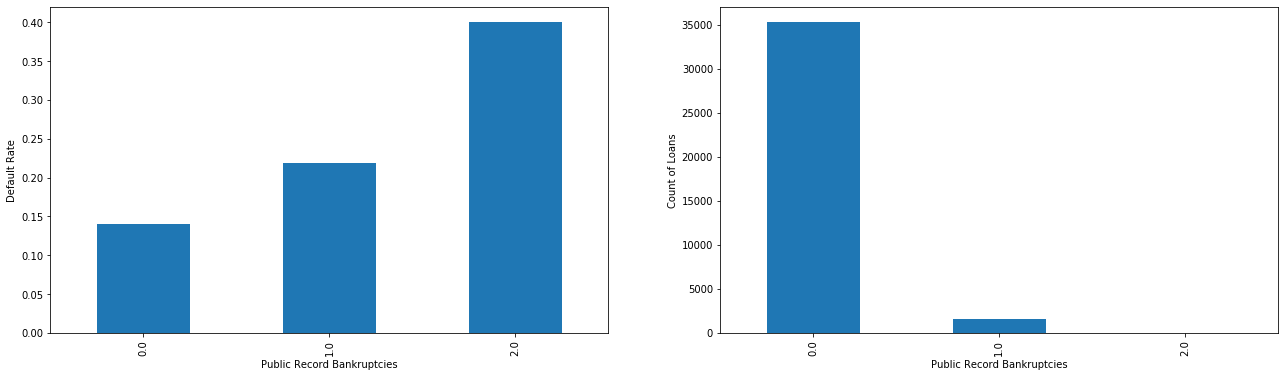

In [59]:
# plotting pub_rec_bankruptcies and default rate

# increase figure size 
plt.figure(figsize=(22, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

#Subplot 1:
plt.subplot(1,2,1)
prbar = df.groupby(['pub_rec_bankruptcies'])['default_rate'].mean().plot.bar()
prbar.set(xlabel="Public Record Bankruptcies",ylabel="Default Rate")


#Subplot 2:
plt.subplot(1,2,2)
countplot = df.pub_rec_bankruptcies.value_counts().plot.bar()
countplot.set(xlabel="Public Record Bankruptcies",ylabel="Count of Loans")

plt.show()

### Summary
- If there is any record of public record bankruptcies there is a high chance of default
- There are very few loans which have public recorded bankruptcies

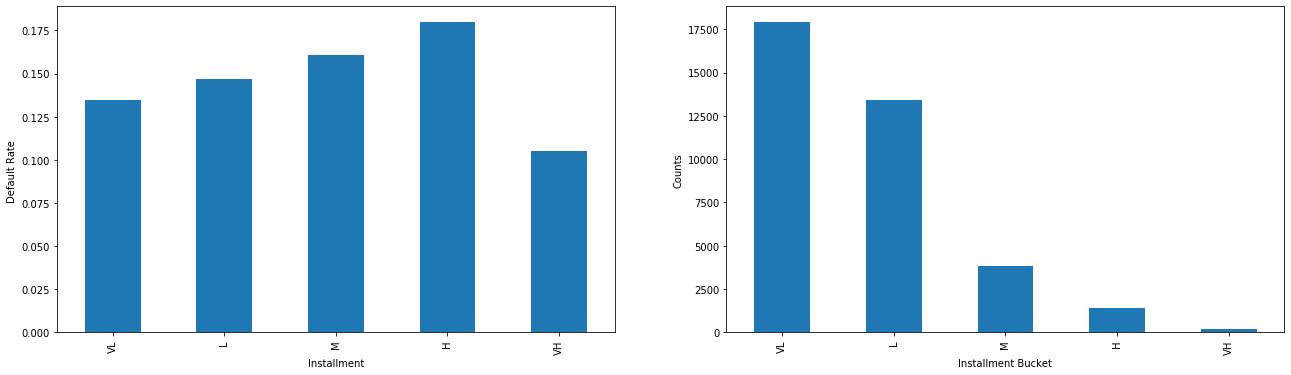

In [60]:
# creating bucket for installments and plotting them
plt.figure(figsize=(22, 6))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
df['installment_bucket'] = pd.cut(df.installment,bins=5,labels=["VL","L","M","H","VH"])

#Subplot 1:
plt.subplot(1,2,1)
tribar = df.groupby(['installment_bucket'])['default_rate'].mean().plot.bar()
tribar.set(xlabel="Installment",ylabel="Default Rate ")

#Subplot 2:
plt.subplot(1,2,2)
countplot = df.installment_bucket.value_counts().plot.bar()
countplot.set(xlabel="Installment Bucket",ylabel="Counts")

plt.show()

### Summary
- As the installment increases the default rate also increases but at very high values, which is between 789.58 and 1043.35 the default rate sees steep decrease.
- So the highest default rate is when the installments are between 789.58 and 1043.35.
- The maximum number of installment comes in the range of 16 and 273 . 

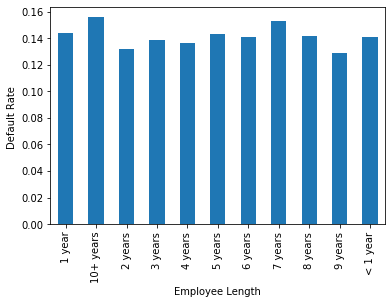

In [61]:
# plotting bar plot between emp_length and default rate
empbar = df.groupby(['emp_length'])['default_rate'].mean().plot.bar()
empbar.set(xlabel="Employee Length",ylabel="Default Rate ")
plt.show()

- Employee Length doesn't have any significance influence on default rate. It remains mostly similar throughout.

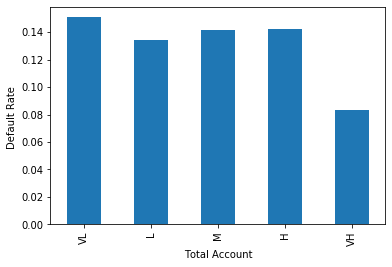

In [62]:
# creating bucket for installments and plotting them
df['total_acc_bucket'] = pd.cut(df.total_acc,bins=5,labels=["VL","L","M","H","VH"])
tribar = df.groupby(['total_acc_bucket'])['default_rate'].mean().plot.bar()
tribar.set(xlabel="Total Account",ylabel="Default Rate ")
plt.show()

- There is no such variation in default rate with total account but at very high values the default value decreases

In [63]:
# function to handle categorical variables 
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1  for x in l]

In [64]:
df_exp = pd.DataFrame()
df_exp['annual_inc'] = df['annual_inc']
df_exp['dti'] = df['dti']
df_exp['emp_length'] = categorize(df['emp_length'])
df_exp['grade'] = categorize(df['grade'])
df_exp['home_ownership'] = categorize(df['home_ownership'])
df_exp['installment'] = df['installment']
df_exp['int_rate'] = df['int_rate']
df_exp['loan_amnt'] = df['loan_amnt']
df_exp['default_rate'] = categorize(df['default_rate'])
df_exp['purpose'] = categorize(df['purpose'])
df_exp['term'] = categorize(df['term'])

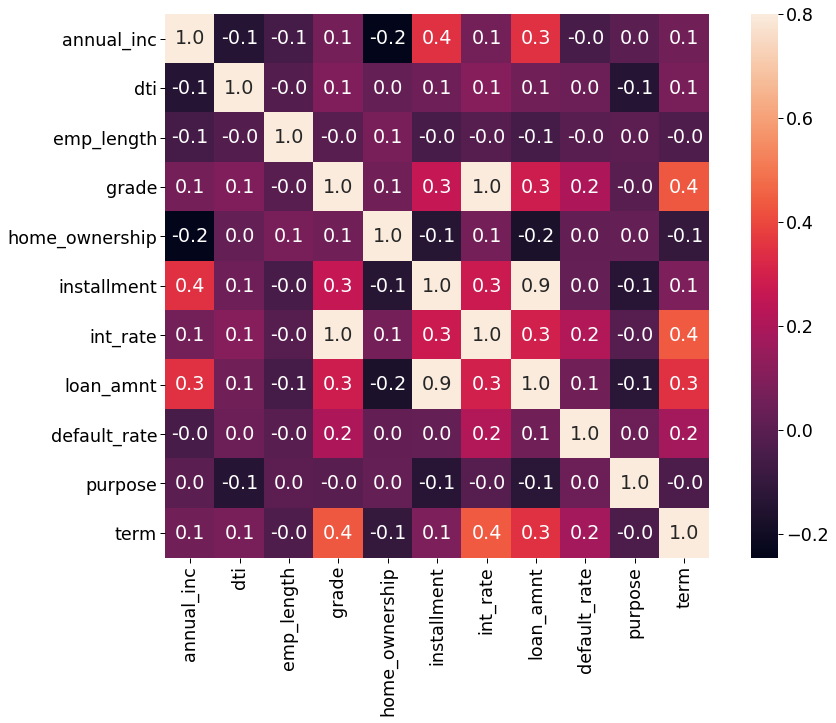

In [65]:
# plotting the correlation between different columns and generating the heatmap
plt.figure(figsize=(15,10))
sns.set_context("paper", font_scale=2)
sns.heatmap(df_exp.corr(), vmax=.8, square=True, annot=True, fmt='.1f')
plt.show()

### Summary
#### We can observe that :- 
- Annual income is highly correlated with loan amount, which can be concluded as for higher annual income the loan amount demanded is also high.
- Grade and Intrest rate is highly correlated with term so when term is long the intrest rate is more and grade is low.
- ###### Default rate is highly correlated with grade , interest rate and terms 


## Conclusion
- After doing exploratory data analysis on the loan dataset we can conclude that Interest
  Rate , Loan Amount , Term and Grade are directly proportional to default rate . DTI is
  also mostly directly proportional to default rate but there is a sudden decrease in Default
  Rate for the very high values of DTI. And Not verified , Source verified , Verified - the
  default rate increases in the same order for Verification Status.

- Lending Club can consider these attributes to figure out which loans are most likely to
  default and reduce their risks. 
